## Week 2: Beyond Linearity ##

1. Referred to:

* "An Introduction to Statistical Learning with Applications in R" (ISLR) [링크 텍스트](https://www.statlearning.com/)

* "An Introduction to Statistical Learning with Applications in Python" (ISLR) [링크 텍스트](https://www.statlearning.com/resources-python)

* https://m-clark.github.io/generalized-additive-models/preface.html

* https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%207.ipynb

  dataset: Wage in the package "ISLR"

2. Introduction

* General Linear Model

  y ~ N(μ, σ^2)

  μ = b0 + b1 * x1 + b2 * x2 + ... + bp * xp

  code ex. model = lm(y ~ x1 + x2, data)

* General linear models' limitations

  1) In its basic form, it can be very limiting in its assumptions about the data generating process for the variable we want to study.

  2) The truth is never linear! Or almost never!
  
  3) Polynomials, step functions, splines, local regression, and generalized additive models offer a lot of flexibility, without losing the ease and interpretability of linear models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import os

Wage = pd.read_csv('Wage.csv')
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


EDA

In [3]:
print(Wage.describe())

              year          age      logwage         wage
count  3000.000000  3000.000000  3000.000000  3000.000000
mean   2005.791000    42.414667     4.653905   111.703608
std       2.026167    11.542406     0.351753    41.728595
min    2003.000000    18.000000     3.000000    20.085537
25%    2004.000000    33.750000     4.447158    85.383940
50%    2006.000000    42.000000     4.653213   104.921507
75%    2008.000000    51.000000     4.857332   128.680488
max    2009.000000    80.000000     5.763128   318.342430


In [4]:
print(Wage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB
None


In [5]:
print(Wage.head())

   year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  


Text(0.5, 0, 'Age')

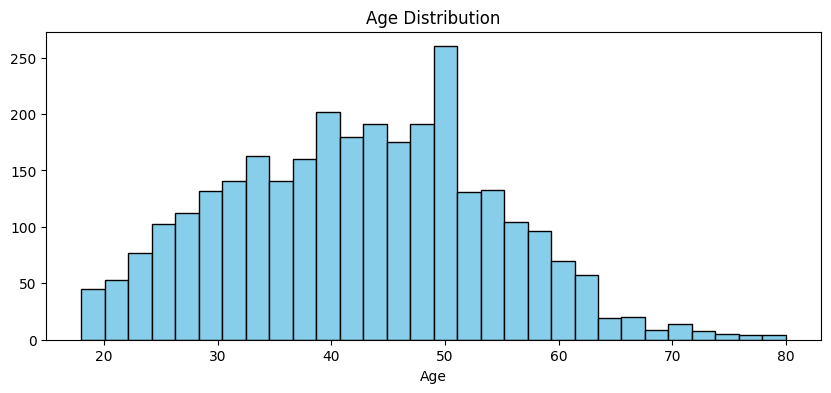

In [6]:
# Variable distributions
plt.figure(figsize=(10, 4))

plt.hist(Wage['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')

Text(0.5, 0, 'Wage')

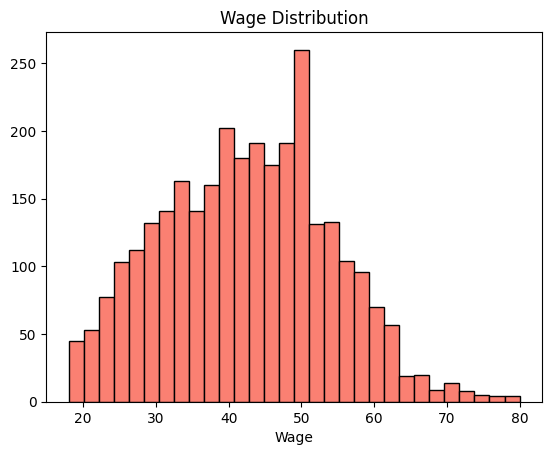

In [7]:
plt.hist(Wage['age'], bins=30, color='salmon', edgecolor='black')
plt.title('Wage Distribution')
plt.xlabel('Wage')

Text(0.5, 0, 'Education Level')

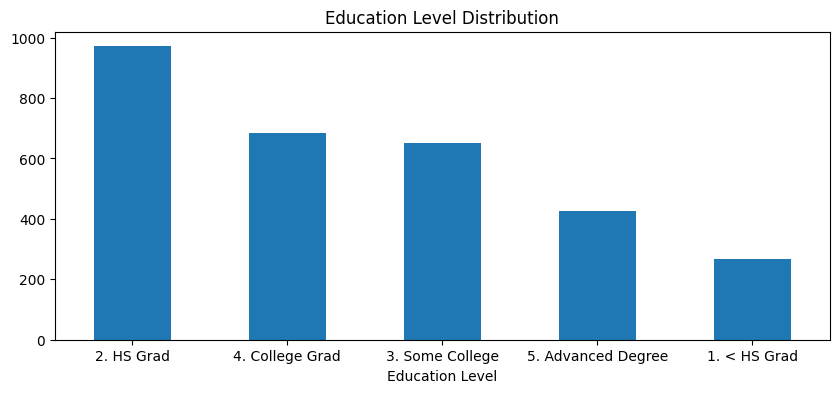

In [8]:
# Categorical variable distributions
plt.figure(figsize=(10, 4))

Wage['education'].value_counts().plot(kind='bar', rot=0)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')

Text(0.5, 0, 'Marital Status')

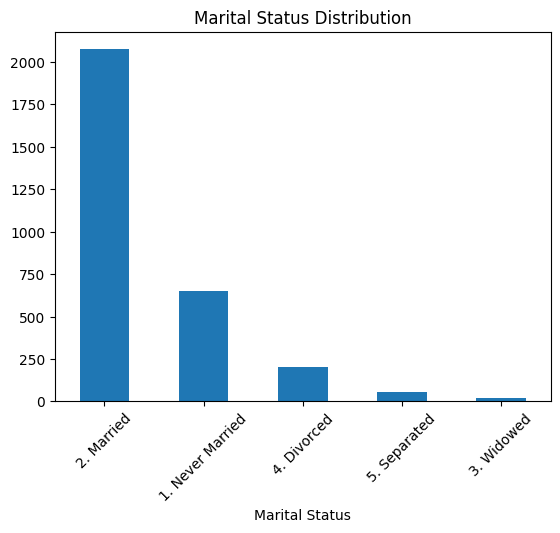

In [9]:
Wage['maritl'].value_counts().plot(kind='bar', rot=45)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')

Text(0, 0.5, 'Wage')

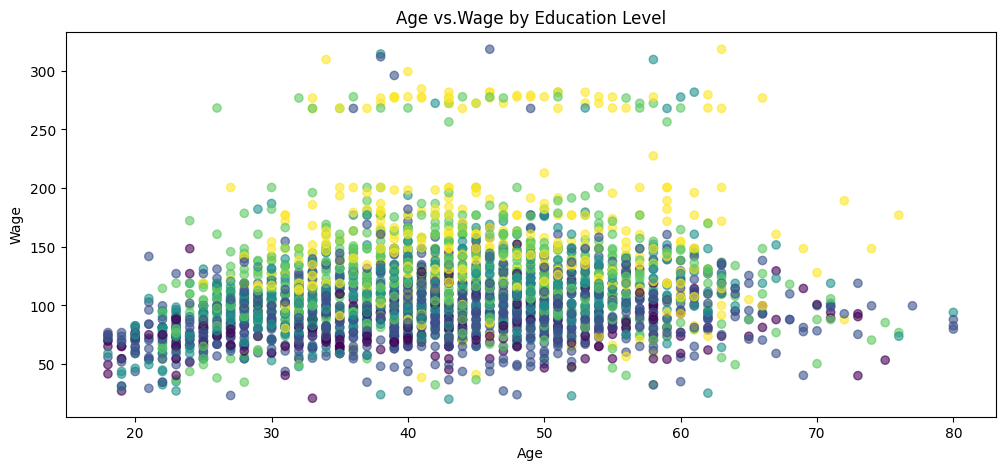

In [10]:
# Variable relationships visuatlization

plt.figure(figsize=(12, 5))

plt.scatter(Wage['age'], Wage['wage'], alpha=0.6, c=Wage['education'].astype('category').cat.codes)
plt.title('Age vs.Wage by Education Level')
plt.xlabel('Age')
plt.ylabel('Wage')

Text(0, 0.5, 'Wage')

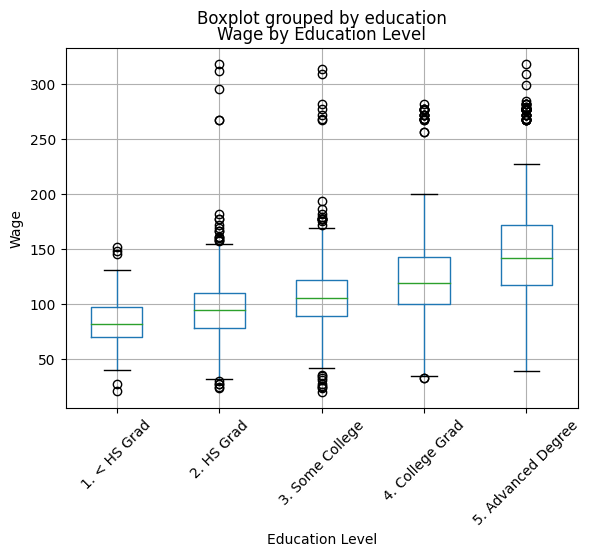

In [11]:
Wage.boxplot(column='wage', by='education', rot=45)
plt.title('Wage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Wage')

General Linear Model

In [12]:
lm = LinearRegression()
X = Wage[['age']]
y= Wage[['wage']]
lm.fit(X, y)
print(f'Intercept: {lm.intercept_}, Coefficient: {lm.coef_}')

Intercept: [81.70473544], Coefficient: [[0.70727593]]


### Polynomials

* Create new variables X_1 = X, X_2 = X^2, etc, and then treat as multiple linear regression.
* Not really interested in the coefficients; more interested in the fitted function values at a value x_0:

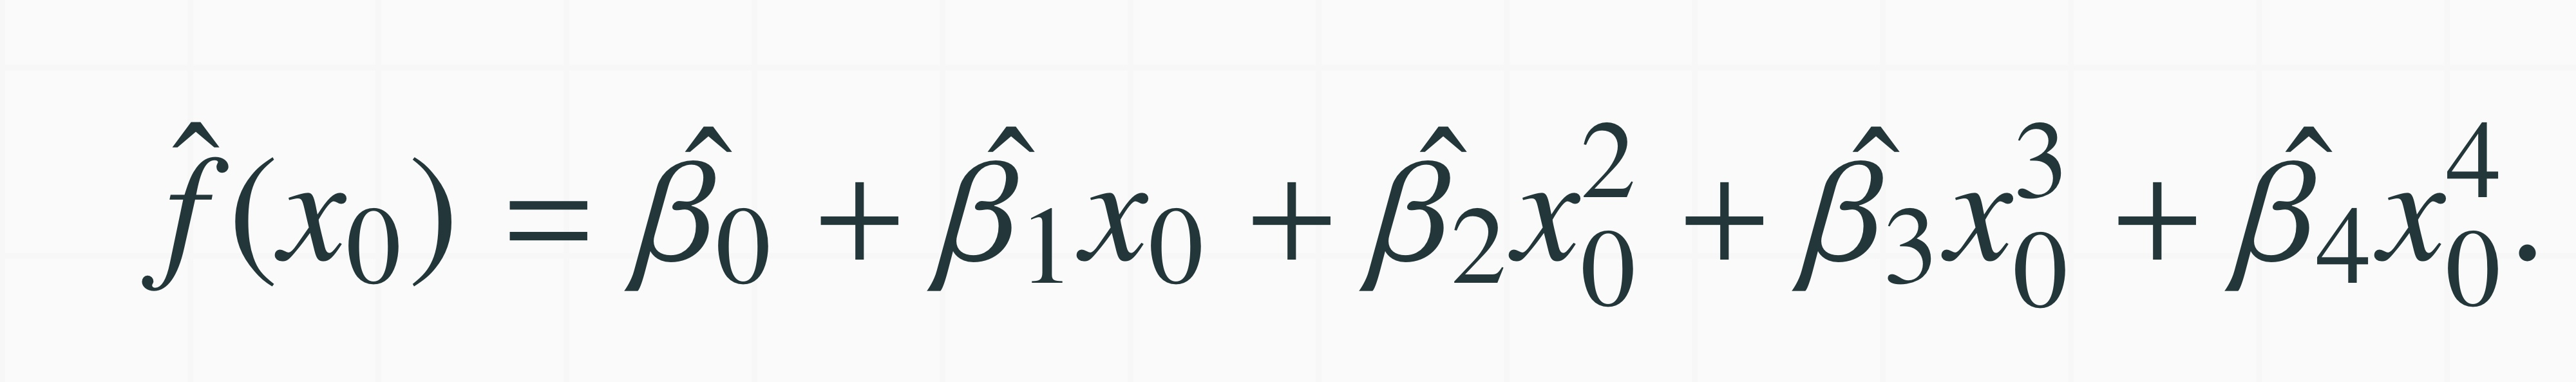

In [13]:
from IPython.display import Image, display

display(Image('Polynomials.jpg'))

  * since f hat(x_0) is linear function of the B hat_l, can get a simple expression for pointwise-variances Var[f hat(x_0) at any value x_0. (x_0마다 f hat(x_0) 구할 수 있음) In the figure we have computed the fit and pointwise standart errors on a grid of valus for x_0. We show f hat(x_0) ± 2*se[f hat(x_0)].
  * We either fix the degree *d* at some reasonably low value, else use cross-validation to choose *d*.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

In [15]:
pm = LinearRegression()
pm.fit(X_poly, y)
print(f'Intercept: {pm.intercept_}, Coefficients: {pm.coef_}')

Intercept: [-184.15417977], Coefficients: [[ 2.12455205e+01 -5.63859313e-01  6.81068771e-03 -3.20383037e-05]]


Text(0, 0.5, 'Wage')

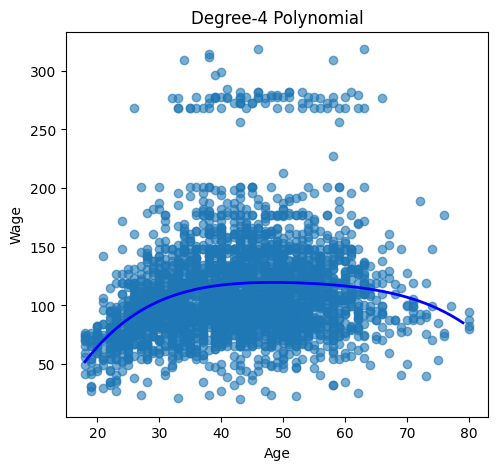

In [16]:
# Visualization

age_grid = np.arange(Wage.age.min(), Wage.age.max()).reshape(-1, 1)
X_test = poly.fit_transform(age_grid)
preds = pm.predict(X_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(Wage['age'], Wage['wage'], alpha=0.6)
plt.plot(age_grid, preds, color='blue', linewidth=2)
plt.title('Degree-4 Polynomial')
plt.xlabel('Age')
plt.ylabel('Wage')

In [17]:
# Deciding the oreder of the polynomial
import statsmodels.api as sm

X1 = PolynomialFeatures(1).fit_transform(X)
X2 = PolynomialFeatures(2).fit_transform(X)
X3 = PolynomialFeatures(3).fit_transform(X)
X4 = PolynomialFeatures(4).fit_transform(X)
X5 = PolynomialFeatures(5).fit_transform(X)

fit1 = sm.GLS(y, X1).fit()
fit2 = sm.GLS(y, X2).fit()
fit3 = sm.GLS(y, X3).fit()
fit4 = sm.GLS(y, X4).fit()
fit5 = sm.GLS(y, X5).fit()

In [18]:
print(sm.stats.anova_lm(fit1, fit2, fit3, fit4, fit5, type=1))

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01


The quadratic model seems the best.

### Step Functions

* Another way of creating transformations of a variable - cut the variable into distinct regions.
* X의 범위에 c1, c2, ..., cK의 절단점(cutpoint)을 사용하여 K+1개의 새로운 변수를 만든다.

  Ex. C1(X)=I(X<35), C2=I(35<=X<50), C3(X)=I(X>=65)

* Useful way of creating interactions that are easy to interpret. For example, interaction effect of *Year* and *Age*:
  
  I(*Year*<2005)*Age, I(*Year*>=2005)*Age

* Choice of cutpoints or **knots** can be problematic.
* Instead of single polynomial in X over its whole domain, we can rather use different polynomials in regions defined by knots.

  Ex.

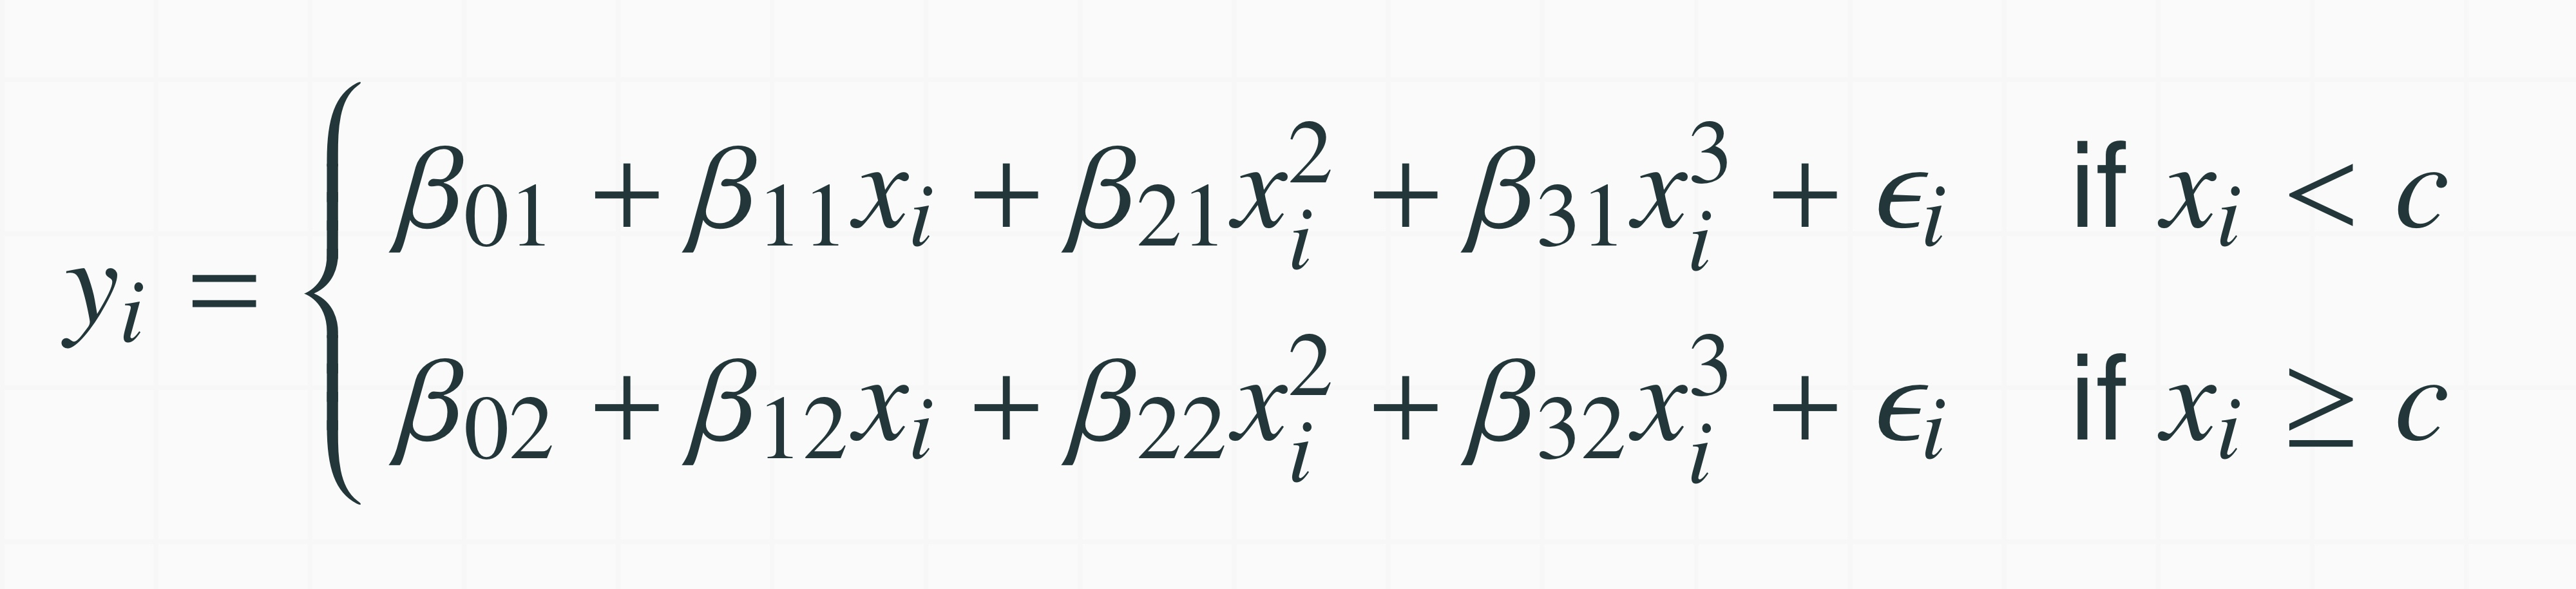

In [19]:
display(Image('Step Functions.jpg'))

In [20]:
Wage_cut, bins = pd.cut(Wage.age, 4, retbins=True, right=True)
Wage_cut.value_counts(sort=False)

age
(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: count, dtype: int64

In [21]:
Wage_steps = pd.concat([Wage.age, Wage_cut, Wage.wage], keys=['age', 'age_cuts', 'wage'], axis=1)
Wage_steps.head(5)

,age,age_cuts,wage
0,18,"(17.938, 33.5]",75.043154
1,24,"(17.938, 33.5]",70.476020
2,45,"(33.5, 49.0]",130.982177
3,43,"(33.5, 49.0]",154.685293
4,50,"(49.0, 64.5]",75.043154


In [22]:
# Create dummy variables for the age groups
Wage_steps_dummies = pd.get_dummies(Wage_steps['age_cuts'])

# Statsmodels requires explicit adding of a constant
Wage_steps_dummies = sm.add_constant(Wage_steps_dummies)

Wage_steps_dummies.head()

,const,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,1.0,True,False,False,False
1,1.0,True,False,False,False
2,1.0,False,True,False,False
3,1.0,False,True,False,False
4,1.0,False,False,True,False


In [23]:
sfm = sm.GLM(Wage_steps['wage'], Wage_steps_dummies.drop(Wage_steps_dummies.columns[0], axis=1)).fit()
print(sfm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          1634.1
Method:                          IRLS   Log-Likelihood:                -15353.
Date:                Mon, 08 Jul 2024   Deviance:                   4.8957e+06
Time:                        16:23:24   Pearson chi2:                 4.90e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.06441
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
(17.938, 33.5]    94.1584      1.476     63.

In [24]:
# Put the test data in the same bins as the training data
bin_mapping = np.digitize(age_grid.ravel(), bins)
bin_mapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [25]:
# Get dummies, drop first dummy category, add constant
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))
X_test2.head()

,const,2,3,4
0,1.0,False,False,False
1,1.0,False,False,False
2,1.0,False,False,False
3,1.0,False,False,False
4,1.0,False,False,False


In [26]:
preds2 = sfm.predict(X_test2)

Text(0, 0.5, 'Wage')

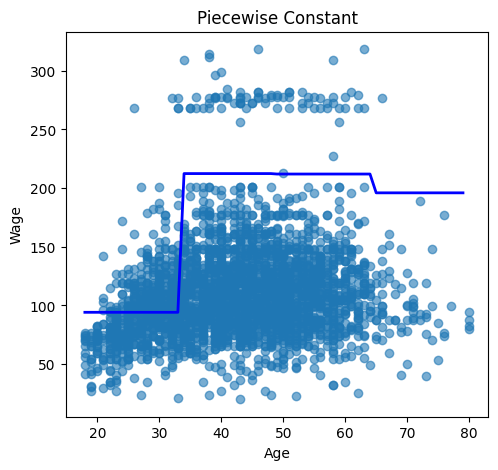

In [27]:
# Visualization

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(Wage['age'], Wage['wage'], alpha=0.6)
plt.plot(age_grid, preds2, color='blue', linewidth=2)
plt.title('Piecewise Constant')
plt.xlabel('Age')
plt.ylabel('Wage')

### Splines



Cubic Splines

* A cubic spline with knots at ξ_k, k=1, ..., K is a piecewise cubic polynomial with continuous derivatives up to order 2 at each knot.

In [28]:
from google.colab import files

uploaded = files.upload()

Saving Cubic Splines.jpg to Cubic Splines (1).jpg


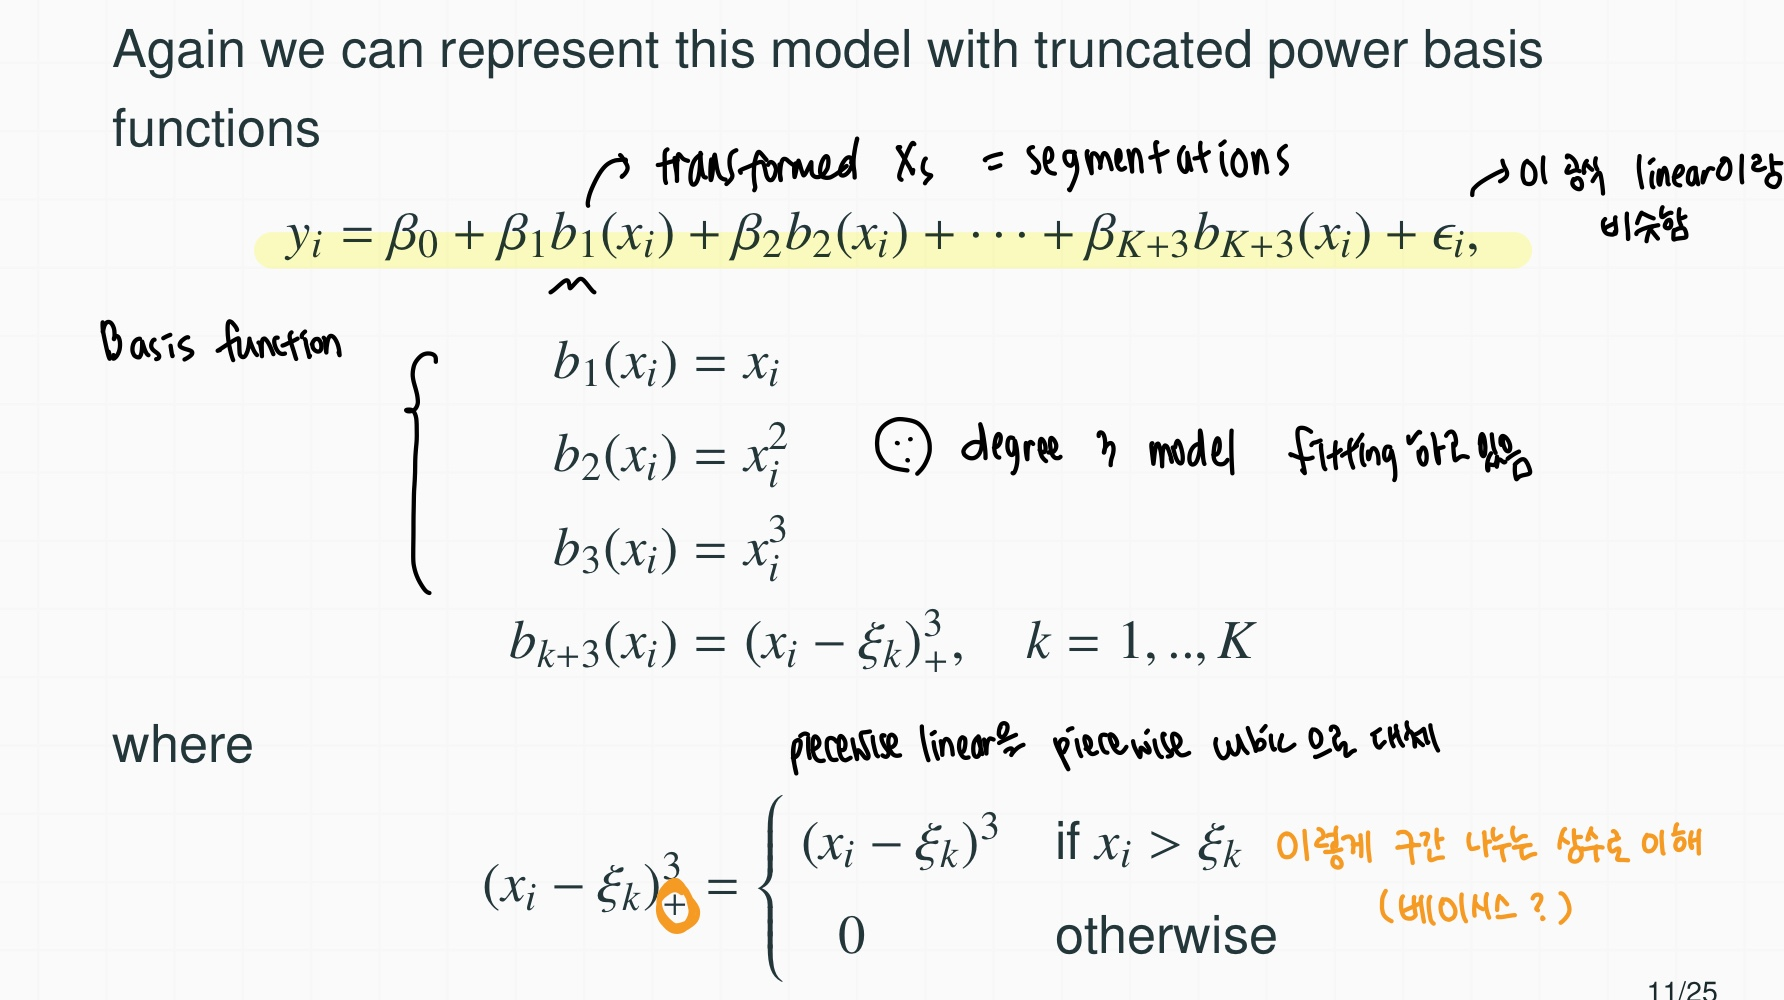

In [29]:
display(Image('Cubic Splines.jpg'))

In [30]:
# Specifying 3 knots
from patsy import dmatrix

spline_basis1 = dmatrix("bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)",
                        {"Wage.age": Wage.age}, return_type='dataframe')
cs = sm.GLM(Wage.wage, spline_basis1).fit()

cs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1594.0
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Mon, 08 Jul 2024   Deviance:                   4.7708e+06
Time:                        16:23:57   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09006
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 60.4937      9.460      6.394      0.000      41.952      79.036
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.9805     12.538      0.317      0.751     -20.593      28.554
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.6310      9.626      4.636      0.000      25.764      63.498
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.8388     10.755      5.843      0.000      41.759      83.919
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.9908     10.706      5.230      0.000      35.007      76.975
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.6881     14.402      3.520      0.000      22.461      78.915
bs(Wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.6061     19.126      0.868      0.385     -20.881      54.093
==========================================================================================================================================
"""

In [31]:
# df=6
spline_basis2 = dmatrix("bs(Wage.age, df=6, include_intercept=False)",
                        {"Wage.age": Wage.age}, return_type='dataframe')
cs2 = sm.GLM(Wage.wage, spline_basis2).fit()

cs2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1592.5
Method:                          IRLS   Log-Likelihood:                -15313.
Date:                Mon, 08 Jul 2024   Deviance:                   4.7662e+06
Time:                        16:23:57   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09101
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         56.3138      7.258      7.759      0.000      42.088      70.539
bs(Wage.age, df=6, include_intercept=False)[0]    27.8240     12.435      2.238      0.025       3.453      52.195
bs(Wage.age, df=6, include_intercept=False)[1]    54.0625      7.127      7.585      0.000      40.093      68.032
bs(Wage.age, df=6, include_intercept=False)[2]    65.8284      8.323      7.909      0.000      49.515      82.142
bs(Wage.age, df=6, include_intercept=False)[3]    55.8127      8.724      6.398      0.000      38.714      72.911
bs(Wage.age, df=6, include_intercept=False)[4]    72.1315     13.745      5.248      0.000      45.192      99.071
bs(Wage.age, df=6, include_intercept=False)[5]    14.7509     16.209      0.910      0.363     -17.018      46.519
==================================================================================================================
"""

**Why changing the degrees of freedom?**

1. **기본 개념**:
* Cubic spline은 piecewise polynomial 함수로, 각 구간마다 3차 다항식을 사용해 데이터를 근사함
* Cubic spline의 자유도는 노드의 개수와 관련됨. 자유도가 증가하면 더 많은 노드를 사용할 수 있고, 이는 더 유연한 곡선을 의미함

2. **자유도 설정**:
* df = # of knots

  Ex. df=6 : 자유도가 6인 cubic spline은 5개의 노드를 가짐

* 자유도를 설정하지 않으면 spline의 기본 설정에 따라 녿가 자동으로 결정됨 (보통 데이터의 특성과 분포에 따라 자동으로 최적의 노드 개수를 선택함)

3. **자유도의 영향**:
* 높은 자유도는 모델이 데이터의 작은 변동까지 잡아낼 수 있지만, 이는 모델이 노이즈까지 학습할 수 있어 과적합의 위험이 있음
* 낮은 자유도는 모델이 데이터의 전체적인 경향을 더 잘 포착하지만, 이는 중요한 패턴을 놓칠 수 있어 과소적합의 위험이 있음


In [32]:
# Predictions

preds3 = cs.predict(dmatrix("bs(age_grid, knots=(25, 40, 60), include_intercept=False)",
                               {"age_grid": age_grid}, return_type='dataframe'))
preds4 = cs2.predict(dmatrix("bs(age_grid, df=6, include_intercept=False)",
                                {"age_grid": age_grid}, return_type='dataframe'))

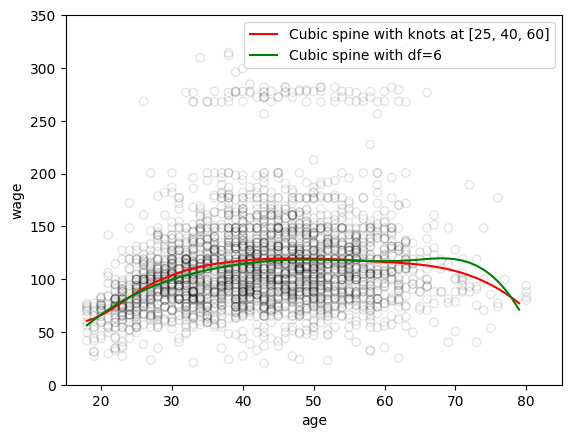

In [33]:
# plot the splines and error bands
plt.scatter(Wage.age, Wage.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, preds3, color='r', label='Cubic spine with knots at [25, 40, 60]')
plt.plot(age_grid, preds4, color='g', label='Cubic spine with df=6')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

Natural Splines

* A natural cubic spline extrapolates linearly beyond the boundary knots.

In [34]:
spline_basis3 = dmatrix("cr(Wage.age, df=4)",
                        {"Wage.age": Wage.age}, return_type='dataframe')
ns = sm.GLM(Wage.wage, spline_basis3).fit()
ns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          1596.4
Method:                          IRLS   Log-Likelihood:                -15318.
Date:                Mon, 08 Jul 2024   Deviance:                   4.7827e+06
Time:                        16:23:58   Pearson chi2:                 4.78e+06
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08766
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                79.6421      1.773     44.918      0.000      76.167      83.117
cr(Wage.age, df=4)[0]   -14.6678      3.436     -4.269      0.000     -21.402      -7.934
cr(Wage.age, df=4)[1]    36.8111      1.950     18.881      0.000      32.990      40.632
cr(Wage.age, df=4)[2]    35.9349      2.056     17.476      0.000      31.905      39.965
cr(Wage.age, df=4)[3]    21.5639      6.989      3.085      0.002       7.865      35.263
=========================================================================================
"""

In [35]:
preds5 = ns.predict(dmatrix("cr(age_grid, df=4)",
                               {"age_grid": age_grid}, return_type='dataframe'))

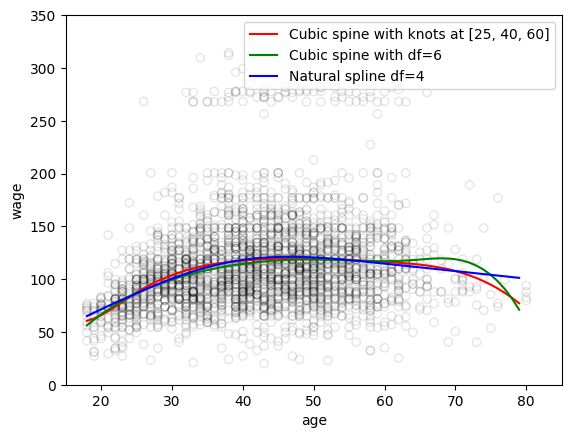

In [36]:
# plot the splines and error bands
plt.scatter(Wage.age, Wage.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, preds3, color='r', label='Cubic spine with knots at [25, 40, 60]')
plt.plot(age_grid, preds4, color='g', label='Cubic spine with df=6')
plt.plot(age_grid, preds5, color='b', label='Natural spline df=4')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

Smoothing Splines

* Choosing # of K and knot placement are tricky
* Smoothing splines are the alternative for those issues.

In [37]:
uploaded = files.upload()

Saving Smoothing Splines.jpg to Smoothing Splines (1).jpg


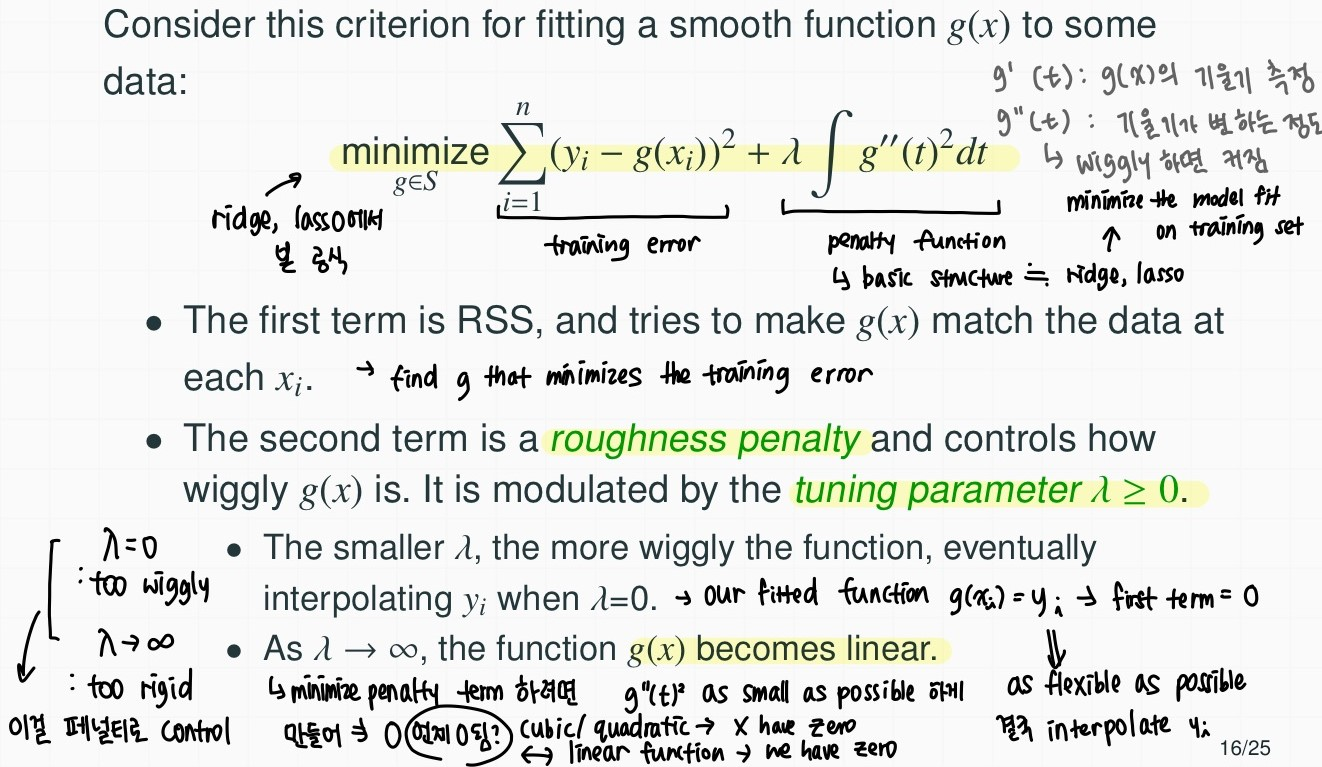

In [38]:
display(Image('Smoothing Splines.jpg'))

### Local Regression ###

* Fitting regression on a local manner.
* With a sliding weight function, we fit separate linear fits over the range of X by weighted least squares.
* Algorithms of Local Regression at X=x0

  1) Gather the fraction *s=k/n* of training points whose xi are closest to x0.

  2) Assign a weight K_i0=K(xi, x0) to each point in this neighborhood, so that the point furthest from x0 has weight zero, and the closest has the highest weight. All but these *k* nearest neighbors get weight zero.

  3) Fit a *weighted lease squares regression* of the yi on the xi using the aforementioned weights, by finding B_0 hat and B_1 hat that minimize RSS.

  4) THe fitted value at x0 is given by f(x0) hat = B0 hat + B1 hat * x0

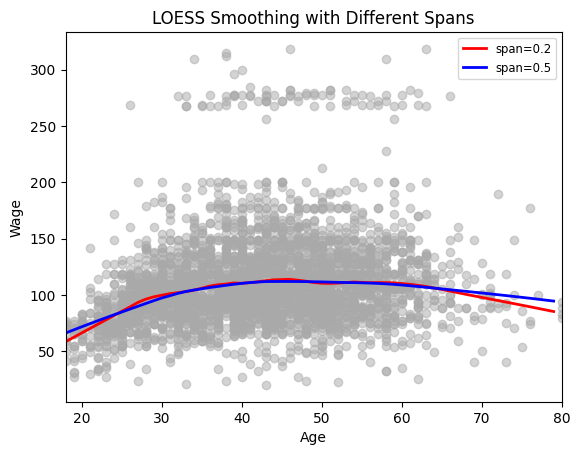

In [39]:
from statsmodels.nonparametric.smoothers_lowess import lowess

agelims = (Wage.age.min(), Wage.age.max())

plt.scatter(Wage.age, Wage.wage, color='darkgrey', alpha=0.5)
plt.xlim(agelims)
plt.xlabel('Age')
plt.ylabel('Wage')

# LOESS with span=0.2
lg = lowess(Wage.wage, Wage.age, frac=0.2)
smoothed_values = np.interp(age_grid, lg[:, 0], lg[:, 1])
plt.plot(age_grid, smoothed_values, color='red', linewidth=2, label='span=0.2')

# LOESS with span=0.5
lg2 = lowess(Wage.wage, Wage.age, frac=0.5)
smoothed_values2 = np.interp(age_grid, lg2[:, 0], lg2[:, 1])
plt.plot(age_grid, smoothed_values2, color='blue', linewidth=2, label='span=0.5')

plt.legend(loc='upper right', fontsize='small')
plt.title('LOESS Smoothing with Different Spans')
plt.show()

### Generalized Additive Models

* GAM allows for flexible nonlinearities in several variables, but retains the additive structure of linear models.

* y_i = B_0 + f_1(x_i1) + f_2(x_i2) + ... + f_p(x_ip) + e_i

  * f_1 : a function of x_1 only
  * f_2 : a function of x_2 only

  ...

  * they are added together => additive form
  * f_p could be different,e.g., cubic splines, natural splines.
  * they are determined using OLS.

In [40]:
# fitting a GAM to predict wage using natural spline functions of year and age, treating education as a categorical predictor

age_basis = dmatrix("cr(Wage.age, df=5)", {"Wage.age": Wage.age}, return_type='dataframe')
year_basis = dmatrix("cr(Wage.year, df=4)", {"Wage.year": Wage.year}, return_type='dataframe').drop(['Intercept'], axis=1)
education_dummies = pd.get_dummies(Wage.education)
education_dummies = education_dummies.drop([education_dummies.columns[0]], axis=1)

In [41]:
# concatenating all the predictors

x_all = pd.concat([age_basis, year_basis, education_dummies], axis=1)

In [42]:
x_all = x_all.astype(float)

gam = sm.OLS(Wage.wage, x_all).fit()
print(gam.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          2.63e-214
Time:                        16:24:19   Log-Likelihood:                -14933.
No. Observations:                3000   AIC:                         2.989e+04
Df Residuals:                    2988   BIC:                         2.996e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 52